<a href="https://colab.research.google.com/github/cynthiamaurice/Data-Science-Road-Map/blob/main/credit_risk_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import streamlit as st

In [5]:
data = pd.read_csv("/content/drive/MyDrive/Machine Learning Project/credit_risk_dataset.csv")
data.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
data.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [8]:
#Data Preprocessing

# Filling numerical missing value columns with mean value
numerical_cols = ["loan_int_rate", "person_emp_length"]
data[numerical_cols] = data[numerical_cols].apply(lambda col: col.fillna(col.mean()))

In [9]:
#to see all settled categorical names
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')


In [10]:
#encode categorical data

le = LabelEncoder()

# List of categorical columns to encode
categorical_cols =['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file']

# Apply LabelEncoder using lambda
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))


In [11]:
print(data.columns)

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')


In [12]:
# Define target variable
target = 'loan_status'

# Define feature columns
features =['person_age', 'person_income', 'person_home_ownership',
        'person_emp_length', 'loan_intent', 'cb_person_default_on_file',
        'cb_person_cred_hist_length']



In [13]:
# Creating feature matrix X and target variable y
x = data[features]
y = data[target]



In [14]:
#  Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
# Train model

model = RandomForestClassifier(random_state=42)
model.fit(x,y)

RandomForestClassifier(random_state=42)

In [16]:
# Step 4: Evaluate the model on the original test data
y_pred = model.predict(x_test)

In [17]:
# Step 5: Check the accuracy and performance

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5072
           1       1.00      0.98      0.99      1445

    accuracy                           1.00      6517
   macro avg       1.00      0.99      0.99      6517
weighted avg       1.00      1.00      1.00      6517



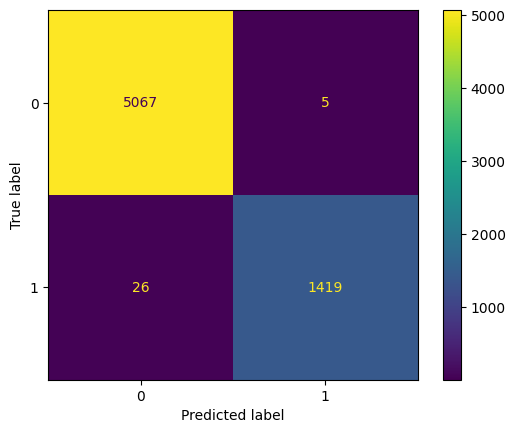

In [18]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()